<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/ClusterAnalysisPlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the data from kaggle 

In [ ]:
 ! pip install -q kaggle
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sakshigoyal7/credit-card-customers
!kaggle datasets download -d mlg-ulb/creditcardfraud

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 60.5MB/s]
 89% 59.0M/66.0M [00:00<00:00, 149MB/s]
100% 66.0M/66.0M [00:00<00:00, 143MB/s]


In [ ]:
! unzip credit-card-customers.zip
! unzip creditcardfraud.zip

Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering ,AffinityPropagation ,AgglomerativeClustering , Birch ,DBSCAN , KMeans ,MiniBatchKMeans ,MeanShift , OPTICS , SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, normalize,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from numpy import unique
from numpy import where

## Cycle of the clustering pseudocode



1.   Define the Library
2.   define dataset
1.   define the model
2.   fit the model
1.   assign a cluster to each example
2.   retrieve unique clusters
1.   create scatter plot for samples from each cluster
2.   For loop Start
1.   get row indexes for samples with this cluster
2.   create scatter of these samples
1.   For loop END
2.   show the plot













## credit-card-customers

In [ ]:
raw_df = pd.read_csv('/content/BankChurners.csv')
raw_df = raw_df.drop(['CLIENTNUM'], axis = 1) 
LabelEncoder = LabelEncoder()
raw_df["Attrition_Flag_N"] = LabelEncoder.fit_transform(raw_df.Attrition_Flag)
raw_df["Gender_N"] = LabelEncoder.fit_transform(raw_df.Gender)
raw_df["Education_Level_N"] = LabelEncoder.fit_transform(raw_df.Education_Level)
raw_df["Marital_Status_N"] = LabelEncoder.fit_transform(raw_df.Marital_Status)
raw_df["Card_Category_N"] = LabelEncoder.fit_transform(raw_df.Card_Category)
raw_df["Income_Category_N"] = LabelEncoder.fit_transform(raw_df.Income_Category)



mylist = ['Attrition_Flag',
'Attrition_Flag_N',
'Customer_Age',
'Gender',
'Gender_N',
'Dependent_count',
'Education_Level',
'Education_Level_N',
'Marital_Status',
'Marital_Status_N',
'Income_Category',
'Income_Category_N',
'Card_Category',
'Card_Category_N',
'Months_on_book',
'Total_Relationship_Count',
'Months_Inactive_12_mon',
'Contacts_Count_12_mon',
'Credit_Limit',
'Total_Revolving_Bal',
'Avg_Open_To_Buy',
'Total_Amt_Chng_Q4_Q1',
'Total_Trans_Amt',
'Total_Trans_Ct',
'Total_Ct_Chng_Q4_Q1',
'Avg_Utilization_Ratio',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

mylistReq = [
'Attrition_Flag_N',
'Customer_Age',
'Gender_N',
'Dependent_count',
'Education_Level_N',
'Marital_Status_N',
'Income_Category_N',
'Card_Category_N',
'Months_on_book',
'Total_Relationship_Count',
'Months_Inactive_12_mon',
'Contacts_Count_12_mon',
'Credit_Limit',
'Total_Revolving_Bal',
'Avg_Open_To_Buy',
'Total_Amt_Chng_Q4_Q1',
'Total_Trans_Amt',
'Total_Trans_Ct',
'Total_Ct_Chng_Q4_Q1',
'Avg_Utilization_Ratio',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [ ]:
raw_df[mylist]

,Attrition_Flag,Attrition_Flag_N,Customer_Age,Gender,Gender_N,Dependent_count,Education_Level,Education_Level_N,Marital_Status,Marital_Status_N,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,1,45,M,1,3,High School,3,Married,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,Existing Customer,1,49,F,0,5,Graduate,2,Single,2,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,Existing Customer,1,51,M,1,3,Graduate,2,Married,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,Existing Customer,1,40,F,0,4,High School,3,Unknown,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,Existing Customer,1,40,M,1,3,Uneducated,5,Married,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,1,50,M,1,2,Graduate,2,Single,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,Attrited Customer,0,41,M,1,2,Unknown,6,Divorced,0,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,Attrited Customer,0,44,F,0,1,High School,3,Married,1,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,Attrited Customer,0,30,M,1,2,Graduate,2,Unknown,3,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df[mylistReq]) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.113451,-0.287438
1,-0.117972,-0.111043


## hierarchical

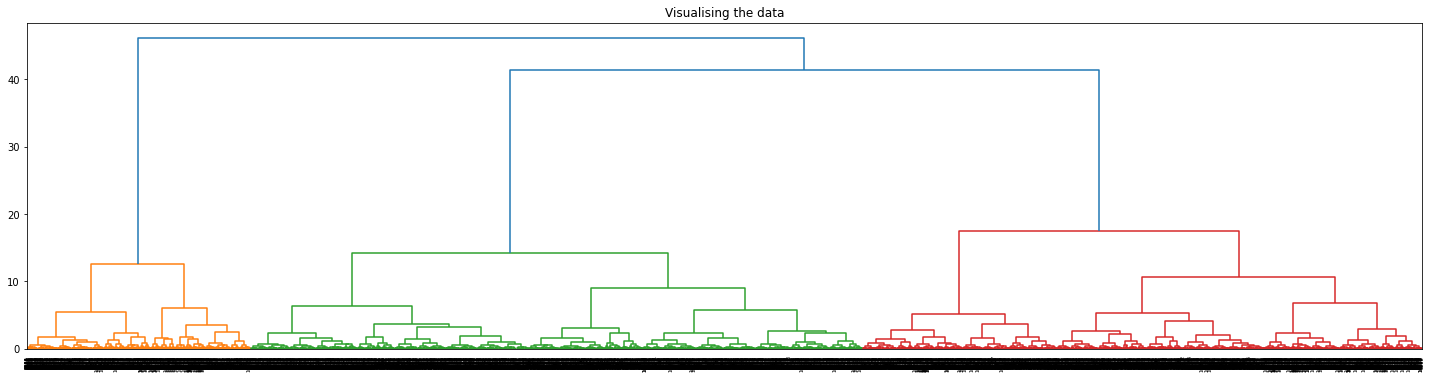

In [ ]:
plt.figure(figsize =(25, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward') )) 

Determine the optimal number of clusters using Silhouette Score

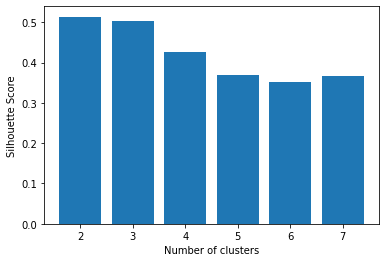

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
n_clusters_my = 2

## AgglomerativeClustering

 the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data

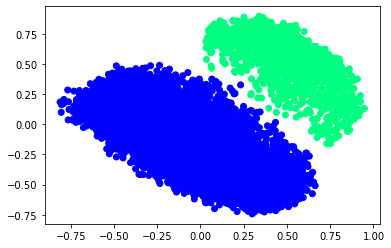

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## AffinityPropagation

the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.

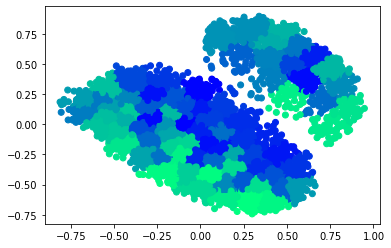

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AffinityPropagation(damping=0.9).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## AgglomerativeClustering

he AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data,

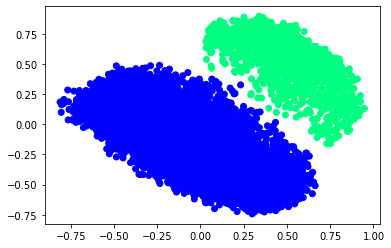

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## Birch

he Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters (estimate of the number of clusters.)

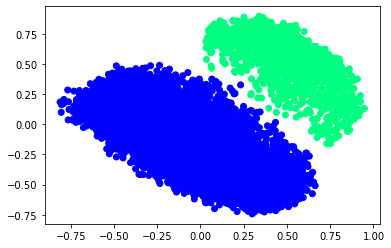

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = Birch(threshold=0.01, n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## DBSCAN

the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

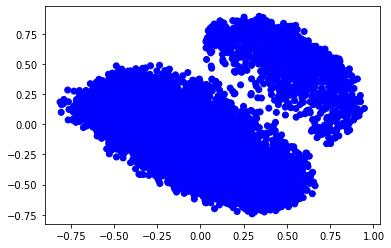

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = DBSCAN(eps=0.30, min_samples=9).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## KMeans

the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

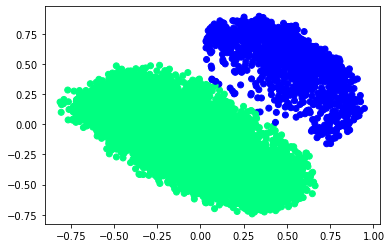

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## MiniBatchKMeans

 the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

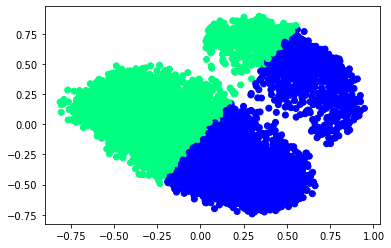

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = MiniBatchKMeans(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## MeanShift

It is implemented via the MeanShift class and the main configuration to tune is the “bandwidth” hyperparameter.

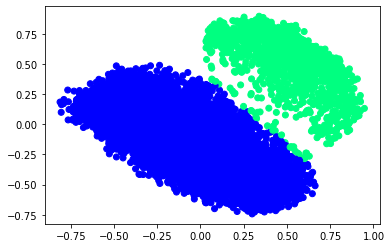

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = MeanShift().fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## OPTICS

he OPTICS class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

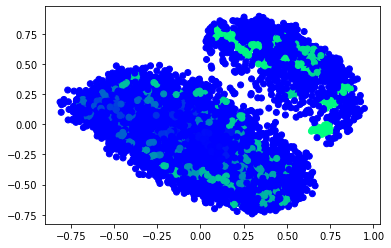

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = OPTICS(eps=0.8, min_samples=10).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## SpectralClustering

the SpectralClustering class and the main Spectral Clustering is a general class of clustering methods, drawn from linear algebra. to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

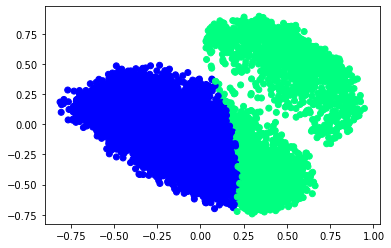

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## GaussianMixture

the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

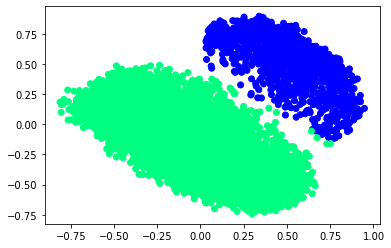

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## credit card fraud

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset consists of 28 anonymized variables, 1 "amount" variable, 1 "time" variable and 1 target variable - Class. Let's look at the distribution of target.

In [ ]:
vc = data['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


Consider only 1000 rows of non fraud cases

In [ ]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [ ]:


# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)


,P1,P2
0,0.347361,-0.076020
1,-0.034156,0.077862


In [ ]:
X_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      1492 non-null   float64
 1   P2      1492 non-null   float64
dtypes: float64(2)
memory usage: 23.4 KB


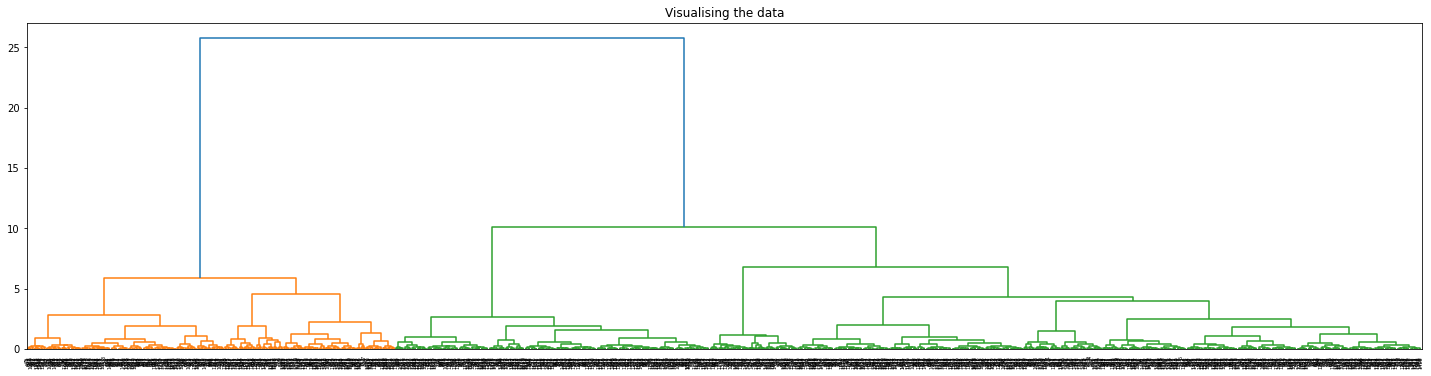

In [ ]:
plt.figure(figsize =(25, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward',) )) 

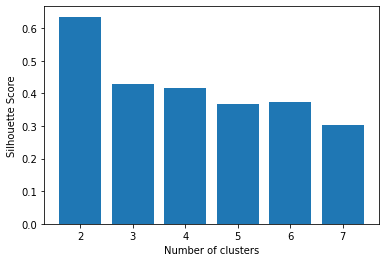

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
n_clusters_my = 2

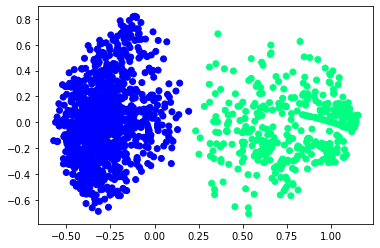

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

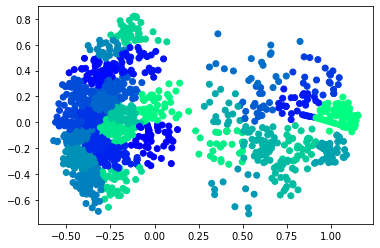

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AffinityPropagation(damping=0.9).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

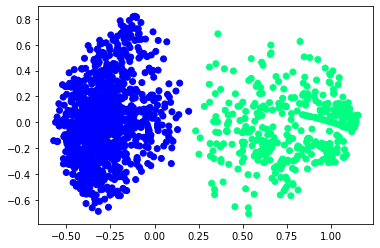

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

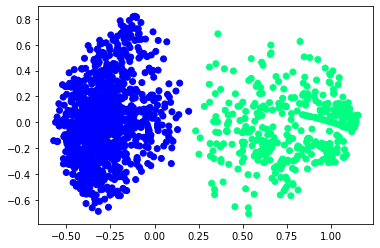

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = Birch(threshold=0.01, n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

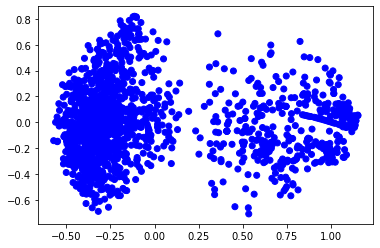

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = DBSCAN(eps=0.30, min_samples=9).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

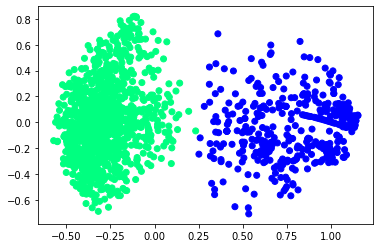

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

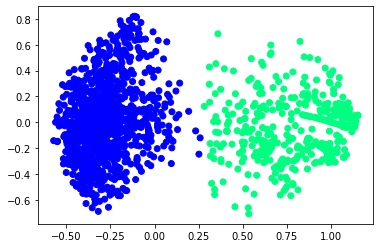

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = MeanShift().fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

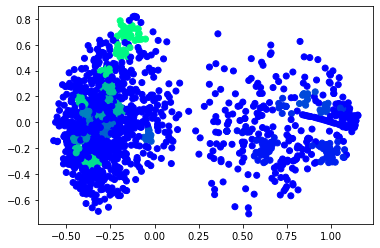

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = OPTICS(eps=0.8, min_samples=10).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 


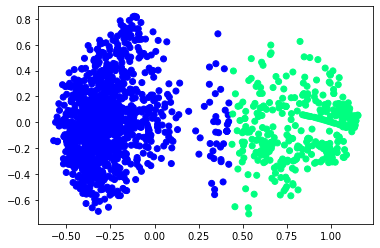

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

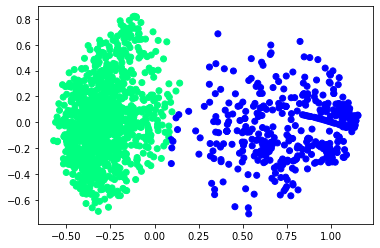

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components=n_clusters_my).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## Summary

For  credit-card-customers data i thing *Agglomerative* *Clustering*.
Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

For creditcardfraud data i thing Agglomerative Clustering. BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.


